In [1]:
%matplotlib notebook

import os
import sys
src_module_path = os.path.abspath(os.path.join('..\src'))
sys.path.append(src_module_path)

price_data_module_path = os.path.abspath(os.path.join('..\data\external'))
sys.path.append(price_data_module_path)

from matplotlib import pyplot as plt

from features import _data_utils as dutils
from models.modelOneEBOptimizer import *
from models.modelOneLBFGSBOptimizer import *
from models.modelOnePSOOptimizer import *
from models.modelTwoEBOptimizer import *
from models.modelTwoLBFGSBOptimizer import *
from models.modelTwoPSOOptimizer import *
from models.modelThreeEBOptimizer import *
from models.modelThreeLBFGSBOptimizer import *
from models.modelThreePSOOptimizer import *

In [7]:
dutils.PATH_TO_DATA = '../data/raw/'
house = "dataid1103.csv"
day = 1
numberOfDays = 20
x, grid, cons, prod, ids = dutils.init_data(house, numberOfDays, day)

# m = ModelOneEBOptimizer(ids, x, grid, cons, prod)
# m = ModelOneLBFGSBOptimizer(ids, x, grid, cons, prod)
# m = ModelOnePSOOptimizer(ids, x, grid, cons, prod)
m = ModelTwoEBOptimizer(ids, x, grid, cons, prod)
# m = ModelTwoLBFGSBOptimizer(ids, x, grid, cons, prod)
# m = ModelTwoPSOOptimizer(ids, x, grid, cons, prod)
# m = ModelThreeEBOptimizer(ids, x, grid, cons, prod)
# m = ModelThreeLBFGSBOptimizer(ids, x, grid, cons, prod)
# m = ModelThreePSOOptimizer(ids, x, grid, cons, prod)

m.optimize()
# REPORT = m.getReport()
# m.showPlot()


In [8]:
[
    np.sum(m.getReport()['newGrid']) + np.sum(m.getReport()['prodUsage']),
    np.sum(m.getReport()['loadCons'][:-24]),
    np.sum(m.getReport()['prodUsage'])
]

[202.43663333333336, 181.03568333333334, 13.500000000000012]

In [9]:
(np.sum(m.getReport()['newGrid']),
np.sum(m.getReport()['loadGrid'].clip(0,100)))

(188.93663333333336, 133.90960000000001)

In [10]:
[
    np.sum(np.array(m.getReport()['newGrid']) * m.getReport()['prices']),
    np.sum(m.getReport()['loadGrid'].clip(0, 100) * m.getReport()['prices'])
]


[6.9526359253333343, 4.1792734453333349]

<IPython.core.display.Javascript object>


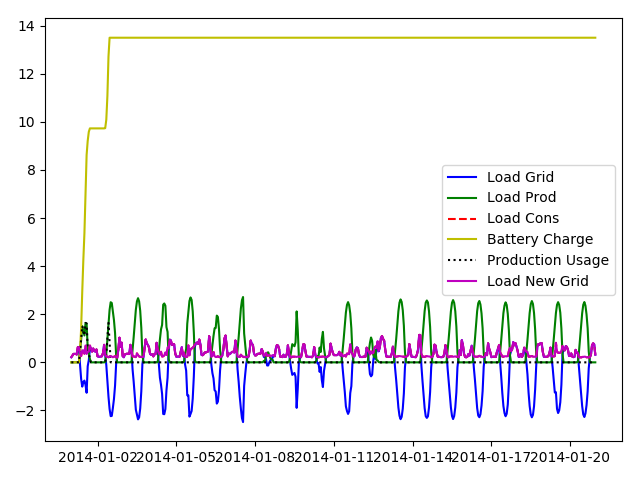

In [11]:
m.showPlot()

In [ ]:
import pandas as pd

m.defineDataAttrs(house, numberOfDays, day)
pathFile = "../data/interim/" + m.getCsvName()
print(pathFile)

df = pd.DataFrame(data=m.getReport())
df.to_csv(path_or_buf=pathFile, sep=";", na_rep="N/A")

In [ ]:
import numpy as np
arr = np.array([-1,-12,-3, 4,5,6,7,8,9])
sss = np.array([7,-7,-7, 7,7,7,7,7,7])

arr = np.where(arr > sss, arr-sss, sss).clip(0, 100)

arr
